# **IPL_ASSIGNMENT**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load & Check Dataset

In [ ]:
df=pd.read_csv("/content/deliveries.csv")  # please change the path if it gives error after uploading the file (deliveries.csv)
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


**NUMPY OPERATIONS**

Mean, standard deviation, and maximum of total runs using statistical methods

In [ ]:
total_runs_array = np.array(df['total_runs'])
print("Mean of total_runs:", np.mean(total_runs_array))
print("Standard deviation of total_runs:", np.std(total_runs_array))
print("Maximum runs on a ball:", np.max(total_runs_array))

Mean of total_runs: 1.313896737734395
Standard deviation of total_runs: 1.605417160090364
Maximum runs on a ball: 10


Counting total number of dot balls using boolean filtering

In [ ]:
dot_balls = np.count_nonzero(total_runs_array == 0)
print("Total number of dot balls:", dot_balls)

Total number of dot balls: 63002


Finding unique over numbers and counting total overs using set operations

In [ ]:
unique_overs = np.unique(df['over'].to_numpy())
print("Unique over numbers:", unique_overs)
print("Total different overs played:", len(unique_overs))

Unique over numbers: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Total different overs played: 20


Displaying first 10 entries in total runs using slicing

In [ ]:
print("First 10 entries in total_runs:")
print(total_runs_array[:10])

First 10 entries in total_runs:
[0 0 4 0 2 0 1 1 4 1]


Calculating overall run rate across all matches using aggregation

In [ ]:
runs = df['total_runs'].to_numpy()
overs_played = df['over'].nunique()
run_rate = np.sum(runs) / overs_played
print("Overall run rate across all matches:", round(run_rate, 2))

Overall run rate across all matches: 11764.5


**PANDA OPERATIONS**

Total runs scored by each team using groupby aggregation

In [ ]:
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("Total runs scored by each team:\n")
team_runs

Total runs scored by each team:



,total_runs
batting_team,
Mumbai Indians,29809
Royal Challengers Bangalore,28126
Kings XI Punjab,27893
Kolkata Knight Riders,27419
Chennai Super Kings,26418
Delhi Daredevils,24388
Rajasthan Royals,22431
Sunrisers Hyderabad,17059
Deccan Chargers,11463


Top 5 run-scorers using groupby and sorting

In [ ]:
top_batsmen = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)
print("Top 5 run-scorers:\n")
top_batsmen

Top 5 run-scorers:



,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632


Top 5 bowlers by number of deliveries using value_counts

In [ ]:
top_bowlers = df['bowler'].value_counts().head(5)
print("Top 5 bowlers by number of deliveries bowled:\n")
top_bowlers

Top 5 bowlers by number of deliveries bowled:



,count
bowler,
Harbhajan Singh,3451
A Mishra,3172
PP Chawla,3157
R Ashwin,3016
SL Malinga,2974


Top 5 wicket-taking bowlers using filtering and value_counts

In [ ]:
wickets_df = df[df['player_dismissed'].notnull()]
bowler_wickets = wickets_df['bowler'].value_counts().head(5)
print("Top 5 wicket-taking bowlers:\n")
bowler_wickets

Top 5 wicket-taking bowlers:



,count
bowler,
SL Malinga,188
DJ Bravo,168
A Mishra,165
Harbhajan Singh,161
PP Chawla,156


Breakdown of extra runs using column-wise summation

In [ ]:
extras_summary = df[['wide_runs', 'noball_runs', 'legbye_runs', 'bye_runs', 'penalty_runs']].sum()
print("Extras breakdown:\n")
extras_summary

Extras breakdown:



,0
wide_runs,6576
noball_runs,749
legbye_runs,3785
bye_runs,884
penalty_runs,10


Count of each dismissal type using value_counts

In [ ]:
dismissal_counts = df['dismissal_kind'].value_counts()
print("Dismissal types count:\n")
dismissal_counts

Dismissal types count:



,count
dismissal_kind,
caught,5348
bowled,1581
run out,852
lbw,540
stumped,278
caught and bowled,211
retired hurt,12
hit wicket,10
obstructing the field,2


Average runs per over using groupby and mean

In [ ]:
avg_runs_per_over = df.groupby('over')['total_runs'].mean()
print("Average runs per over:\n")
avg_runs_per_over

Average runs per over:



,total_runs
over,
1,0.979486
2,1.154138
3,1.287095
4,1.322849
5,1.329695
6,1.341626
7,1.086179
8,1.160380
9,1.205395


Counting total deliveries in super overs using conditional filtering

In [ ]:
super_over_balls = df[df['is_super_over'] == 1].shape[0]
print("Total deliveries in super overs:", super_over_balls)

Total deliveries in super overs: 81


Most matches batted by each team using value_counts

In [ ]:
most_batted_team = df['batting_team'].value_counts()
most_batted_team

,count
batting_team,
Mumbai Indians,22619
Kings XI Punjab,20931
Royal Challengers Bangalore,20908
Kolkata Knight Riders,20858
Chennai Super Kings,19762
Delhi Daredevils,18786
Rajasthan Royals,17292
Sunrisers Hyderabad,12908
Deccan Chargers,9034


Total team appearances (batting and bowling combined)

In [ ]:
team_counts = pd.concat([df['batting_team'], df['bowling_team']]).value_counts()
print("\nTeam appearances:")
team_counts


Team appearances:


,count
Mumbai Indians,45136
Royal Challengers Bangalore,42144
Kolkata Knight Riders,41798
Kings XI Punjab,41713
Chennai Super Kings,39318
Delhi Daredevils,37511
Rajasthan Royals,34674
Sunrisers Hyderabad,25687
Deccan Chargers,18073
Pune Warriors,10900


Counting total number of unique matches using match_id

In [ ]:
unique_matches = df['match_id'].nunique()
print("\nNumber of unique matches:",unique_matches)


Number of unique matches: 756


**MATPLOTLIB OPERATIONS**

Total Runs per Over using Line Plot

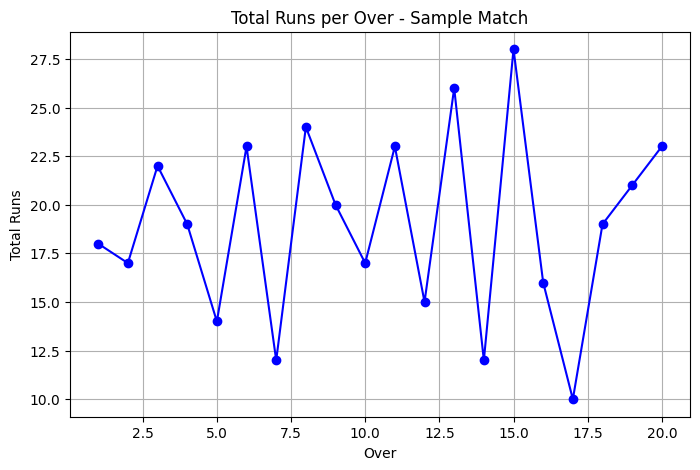

In [ ]:
sample_match = df[df['match_id'] == df['match_id'].unique()[0]]
runs_per_over = sample_match.groupby('over')['total_runs'].sum()

plt.figure(figsize=(8, 5))
plt.plot(runs_per_over.index, runs_per_over.values, marker='o', color='blue')
plt.title('Total Runs per Over - Sample Match')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.grid()
plt.show()

Top 5 batsmen by total runs using Bar Chart

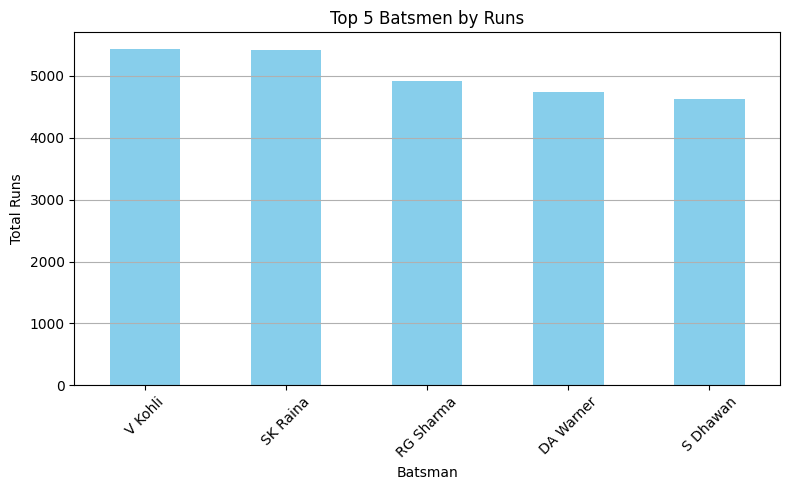

In [ ]:
top_batsmen = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top_batsmen.plot(kind='bar', color='skyblue')
plt.title("Top 5 Batsmen by Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Distribution of runs scored per ball using Histogram

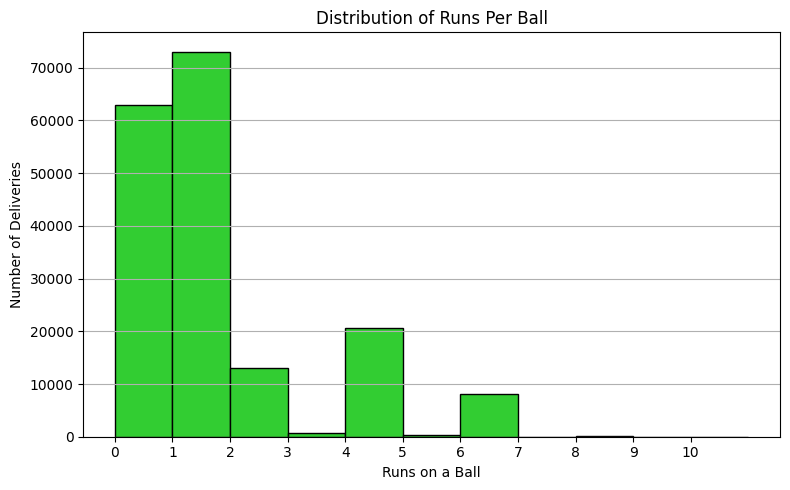

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['total_runs'], bins=range(0, 12), color='limegreen', edgecolor='black')
plt.title("Distribution of Runs Per Ball")
plt.xlabel("Runs on a Ball")
plt.ylabel("Number of Deliveries")
plt.xticks(range(0, 11))
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Distribution of dismissal types using Pie Chart

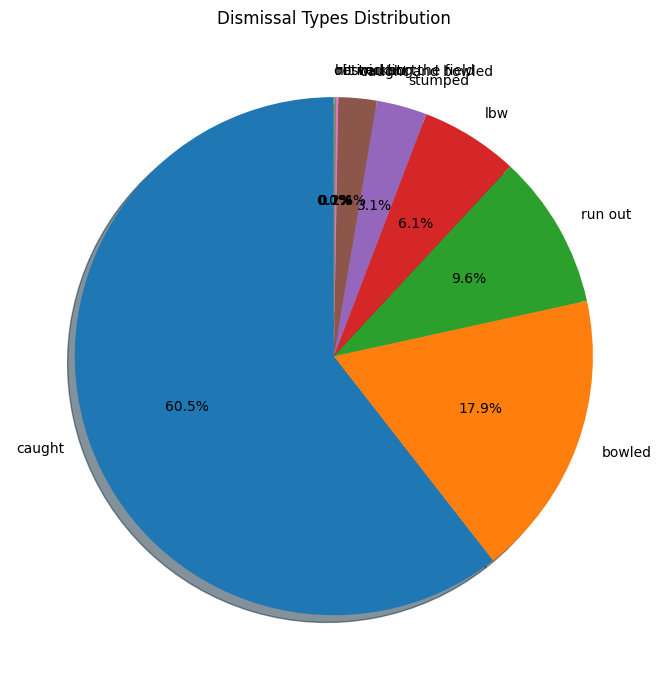

In [ ]:
dismissal_types = df['dismissal_kind'].value_counts()

plt.figure(figsize=(7, 7))
dismissal_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Dismissal Types Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

Over vs Total Runs using Scatter Plot

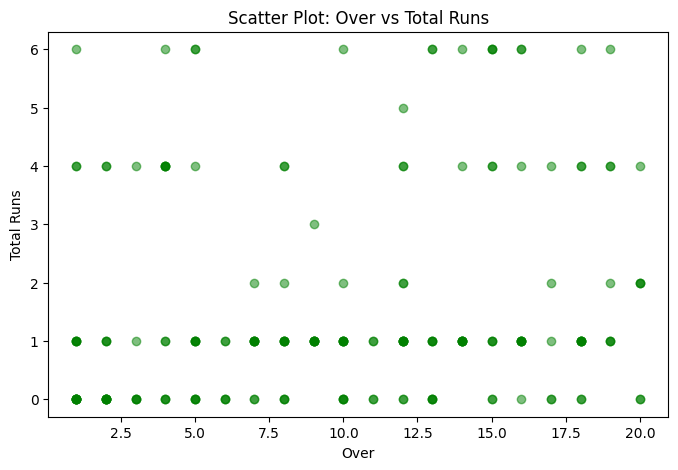

In [ ]:
sample = df.sample(200)
plt.figure(figsize=(8, 5))
plt.scatter(sample['over'], sample['total_runs'], alpha=0.5, color='green')
plt.title('Scatter Plot: Over vs Total Runs')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

**SEABORN OPERATIONS**

Number of Deliveries by Batting Team using Count Plot

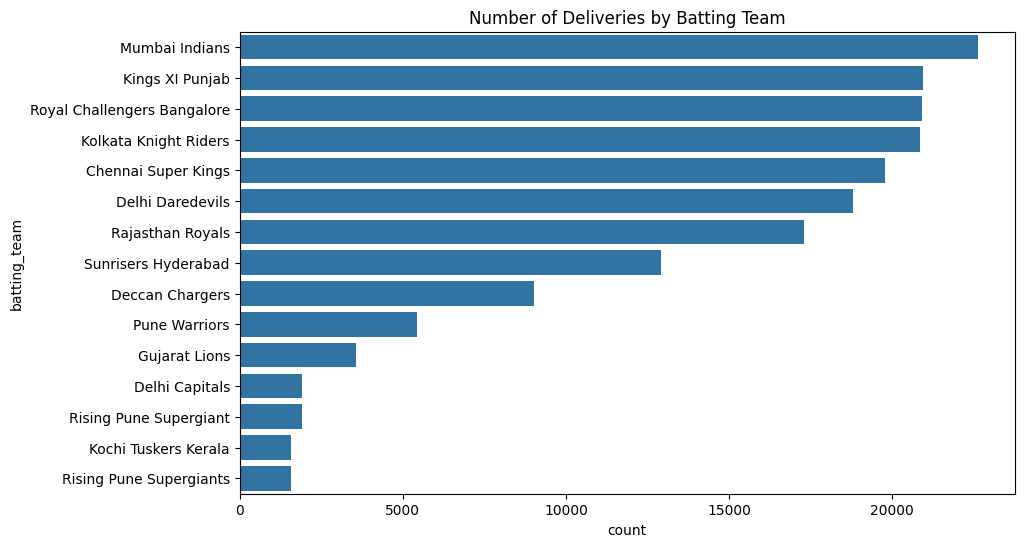

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='batting_team', order=df['batting_team'].value_counts().index)
plt.title('Number of Deliveries by Batting Team')
plt.show()

  Total Runs per Over using Bar Plot

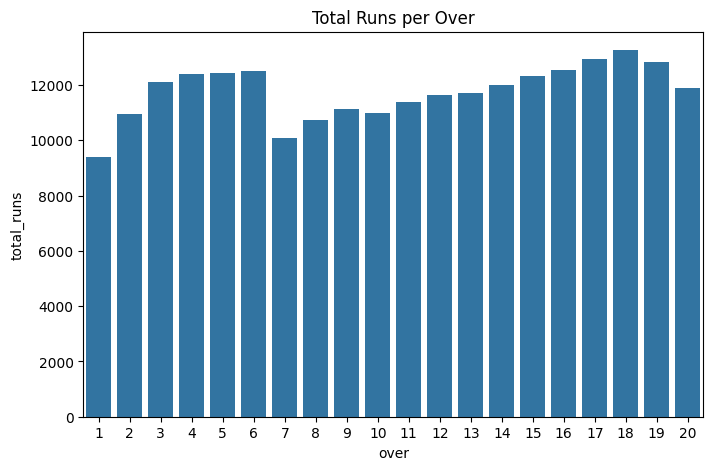

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='over', y='total_runs', estimator=sum, errorbar=None)
plt.title('Total Runs per Over')
plt.show()

Distribution of Batsman Runs by Over using Box Plot

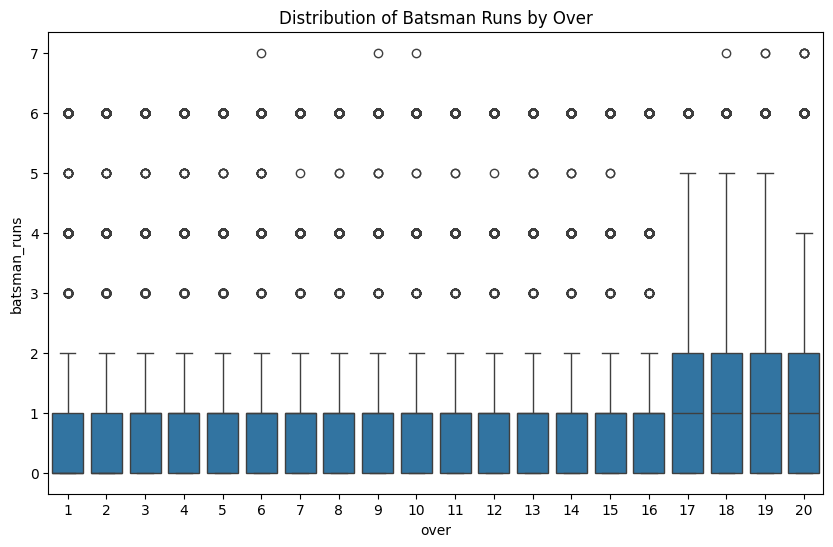

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='over', y='batsman_runs')
plt.title('Distribution of Batsman Runs by Over')
plt.show()

Correlation Between Numeric Columns using Heat Map

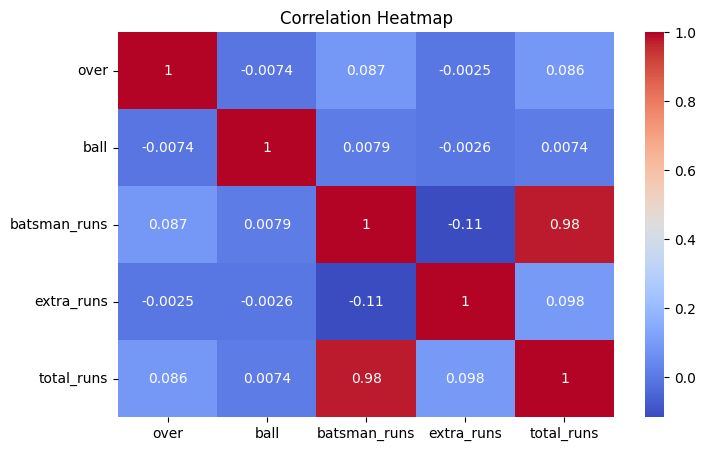

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Relationship Between Runs Columns using Pair Plot

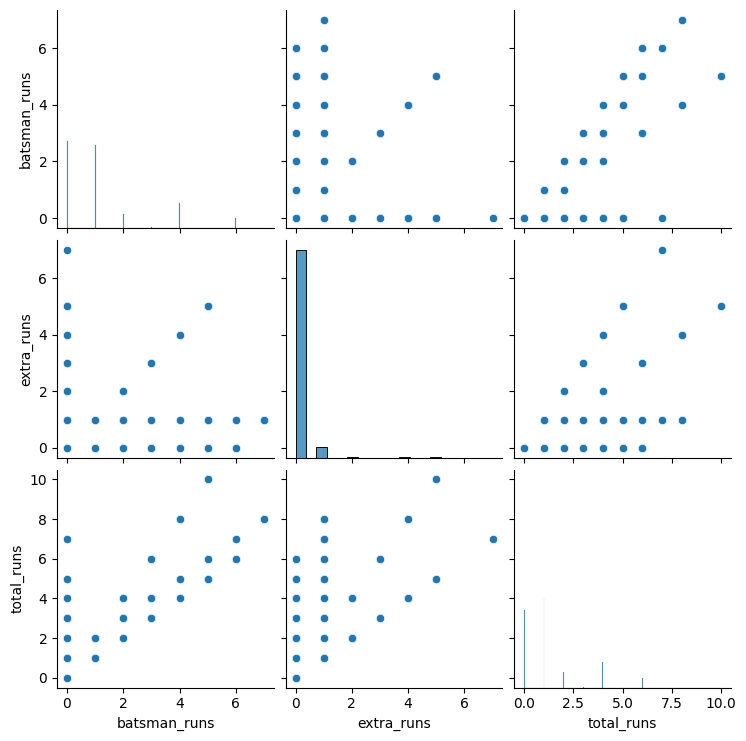

In [ ]:
sns.pairplot(df[['batsman_runs', 'extra_runs', 'total_runs']])
plt.show()